In [1]:
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
mods = ['bcc-csm1-1','CanESM2','CCSM4','CSIRO-Mk3-6-0','GFDL-CM3','GISS-E2-R','HadGEM2-ES','inmcm4','IPSL-CM5A-LR','MIROC-ESM','MIROC5','MPI-ESM-LR','MRI-CGCM3','NorESM1-M']

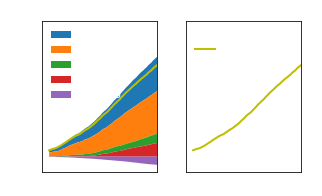

In [40]:
i = 5
j = 142
scen = 'rcp45'

mpl.rcParams['xtick.labelsize']       = 11
mpl.rcParams['ytick.labelsize']       = 11
mpl.rcParams['lines.linewidth']       = 2.
mpl.rcParams['axes.labelsize']        = 11
#mpl.rcParams['axes.labelweight']      = 'bold'
mpl.rcParams['axes.titlesize']        = 11
mpl.rcParams['axes.titleweight']      = 'bold'
mpl.rcParams['figure.subplot.bottom'] = .2
mpl.rcParams['figure.subplot.top']    = .9
mpl.rcParams['figure.subplot.left']   = .15
mpl.rcParams['figure.subplot.right']  = .95
mpl.rcParams['figure.subplot.wspace'] = .25
mpl.rcParams['figure.subplot.hspace'] = .3
mpl.rcParams['figure.figsize']        = 4.5,3
mpl.rcParams['savefig.transparent']   = True
mpl.rcParams['axes.labelcolor']       = 'w'
mpl.rcParams['xtick.color']           = 'w'
mpl.rcParams['ytick.color']           = 'w'
mpl.rcParams['text.color']            = 'w'
mpl.rcParams["legend.frameon"] = False

fig,ax = plt.subplots(1,2,sharey=True)

mshow = 6

for m,model in enumerate(mods):
    with xr.open_dataset(f'data/Adyn/{model}_{scen}.nc') as ds:
        adyn = ds['SLR'].values
        time = ds['time'].values
    with xr.open_dataset(f'data/Asmb/{model}_{scen}.nc') as ds:
        asmb = ds['SLR'].values
    with xr.open_dataset(f'data/Gsmb/{model}_{scen}.nc') as ds:
        gsmb = ds['SLR'].values
    with xr.open_dataset(f'data/steric/{model}_{scen}.nc') as ds:
        ster = ds['SLR'].values        
    with xr.open_dataset(f'data/glacier/{model}_{scen}.nc') as ds:
        glac = ds['SLR'].values   
    slr = adyn+asmb+gsmb+ster+glac

    if m==mshow:
        ax[0].fill_between(time,adyn+gsmb+glac,adyn+gsmb+glac+ster,label='steric')
        ax[0].fill_between(time,adyn+gsmb,adyn+gsmb+glac,label='glacier')
        ax[0].fill_between(time,adyn,adyn+gsmb,label='GrSMB')
        ax[0].fill_between(time,0,adyn,label='Ant dyn')
        ax[0].fill_between(time,asmb,0,label='Ant SMB')          
    
    if m==mshow:
        ax[0].plot(time,slr,lw=2,color='y')
        ax[1].plot(time,slr,lw=2,color='y',label='Examble',zorder=10)
    elif m==0:
        ax[1].plot(time,slr,lw=1,color='w',label='ensemble')
    else:
        ax[1].plot(time,slr,lw=1,color='w')

for Ax in ax:
    Ax.legend()
    Ax.set_xlim([2000,2100])
ax[0].set_title('Example ESM')
ax[1].set_title('Model ensemble')    
ax[0].set_ylabel('Global mean sea level rise [cm]')

plt.savefig('figures/posterplot_timeseries.pdf')
plt.show()
plt.close()